(test-functions:hyper-sphere)=
# Hyper-sphere Bound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The hyper-sphere bound problem is a two-dimensional function used
in {cite}`Li2018` as a test function for reliability analysis algorithms.

The plots of the function are shown below. The left plot shows the surface
plot of the performance function, the center plot shows the contour
plot with a single contour line at function value of $0.0$ (the limit-state
surface), and the right plot shows the same plot with $10^6$ sample points
overlaid.

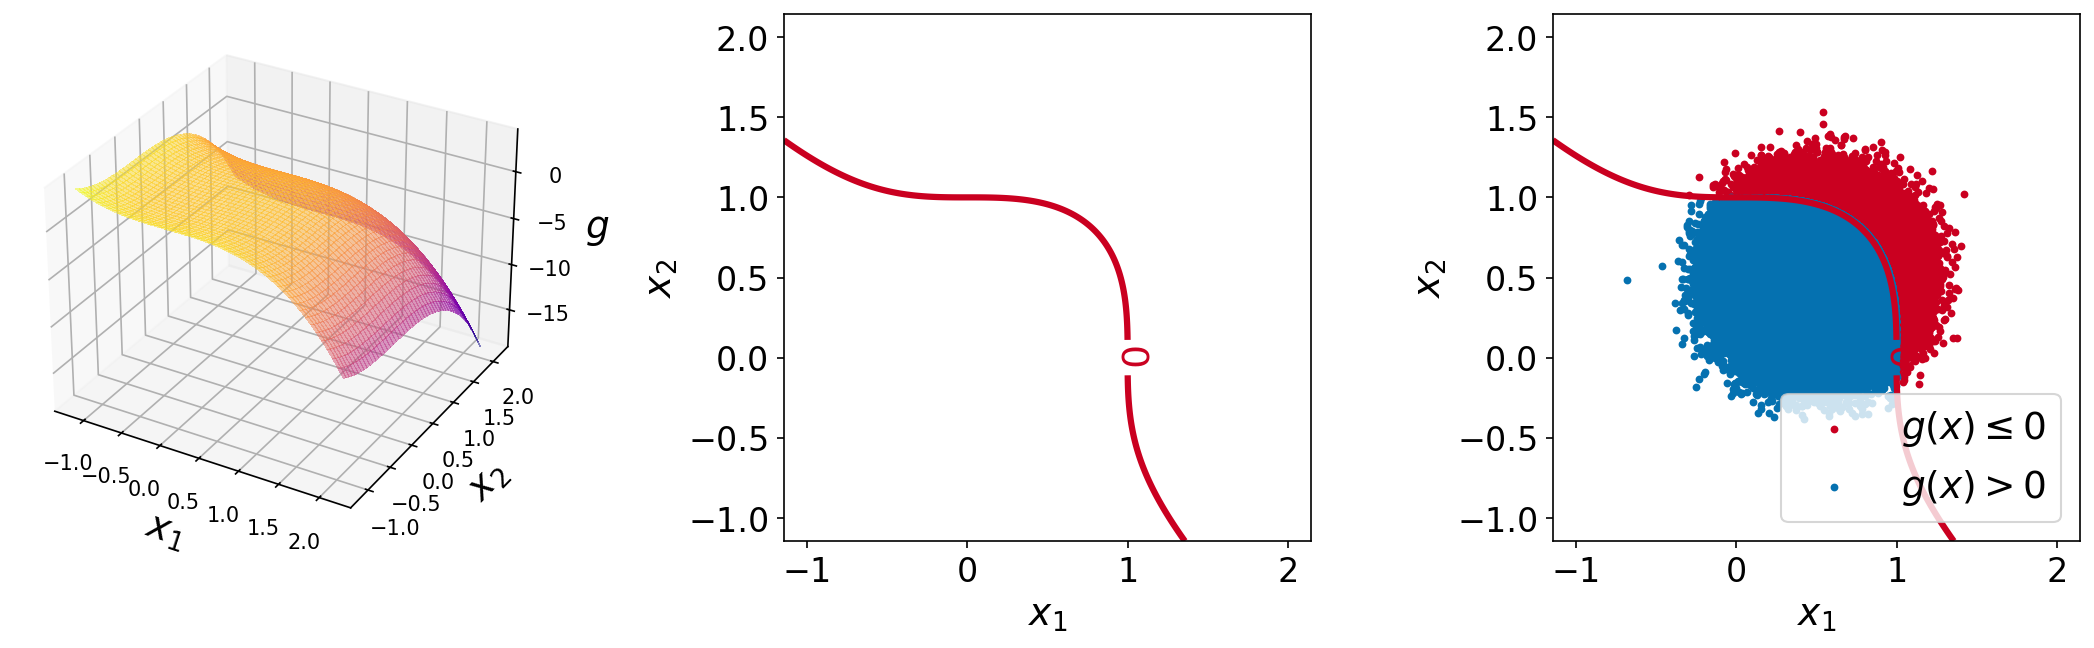

In [2]:
my_fun = uqtf.HyperSphere()
my_fun.prob_input.reset_rng(237324)
xx = my_fun.prob_input.get_sample(1000000)
yy = my_fun(xx)
idx_neg = yy <= 0.0
idx_pos = yy > 0.0

lb_1 = my_fun.prob_input.marginals[0].lower
ub_1 = my_fun.prob_input.marginals[0].upper
lb_2 = my_fun.prob_input.marginals[1].lower
ub_2 = my_fun.prob_input.marginals[1].upper

# Create 2-dimensional grid
xx_1 = np.linspace(lb_1, ub_1, 1000)[:, np.newaxis]
xx_2 = np.linspace(lb_2, ub_2, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1, xx_2)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create the plot
fig = plt.figure(figsize=(15, 5))

# Surface
axs_0 = plt.subplot(131, projection='3d')
axs_0.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_0.set_xlabel("$x_1$", fontsize=18)
axs_0.set_ylabel("$x_2$", fontsize=18)
axs_0.set_zlabel("$g$", fontsize=18)

# Contour plot
axs_1 = plt.subplot(132)
cf = axs_1.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_1.set_xlim([lb_1, ub_1])
axs_1.set_ylim([lb_2, ub_2])
axs_1.set_xlabel("$x_1$", fontsize=18)
axs_1.set_ylabel("$x_2$", fontsize=18)
axs_1.tick_params(labelsize=16)
axs_1.set_aspect("equal", "box")
axs_1.clabel(cf, inline=True, fontsize=18)

# Scatter plot
axs_2 = plt.subplot(133)
cf = axs_2.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_2.scatter(
    xx[idx_neg, 0],
    xx[idx_neg, 1],
    color="#ca0020",
    marker=".",
    s=30,
    label="$g(x) \leq 0$"
)
axs_2.scatter(
    xx[idx_pos, 0],
    xx[idx_pos, 1],
    color="#0571b0",
    marker=".",
    s=30,
    label="$g(x) > 0$"
)
axs_2.set_xlim([lb_1, ub_1])
axs_2.set_ylim([lb_2, ub_2])
axs_2.set_xlabel("$x_1$", fontsize=18)
axs_2.set_ylabel("$x_2$", fontsize=18)
axs_2.tick_params(labelsize=16)
axs_2.set_aspect("equal", "box")
axs_2.clabel(cf, inline=True, fontsize=18)
axs_2.legend(fontsize=18, loc="lower right");

plt.gcf().tight_layout(pad=4.0)
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.HyperSphere()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : HyperSphere
Spatial dimension : 2
Description       : Hyper-sphere bound reliability problem from Li et al. (2018)


## Description

The test function (i.e., the performance function) is analytically defined
as follows [^location]:

$$
g(\boldsymbol{x}) = 1 - x_1^3 - x_2^3
$$

where $\boldsymbol{x} = \{ x_1, x_2 \}$ is the two-dimensional vector of
input variables probabilistically defined further below.

The failure state and the failure probability are defined as
$g(\boldsymbol{x}) \leq 0$ and $\mathbb{P}[g(\boldsymbol{X}) \leq 0]$,
respectively.

## Probabilistic input

Based on {cite}`Li2018`, the probabilistic input model for
the test function consists of two independent standard normal random variables
(see the table below).

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='normal', parameters=array([0.5, 0.2]), name='X1', description='None'), UnivDist(distribution='normal', parameters=array([0.5, 0.2]), name='X2', description='None')), copulas=None, name='Li2018', description='Input model for the hyper-sphere reliability problem from Li et al. (2018)')

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $10^6$ random points:

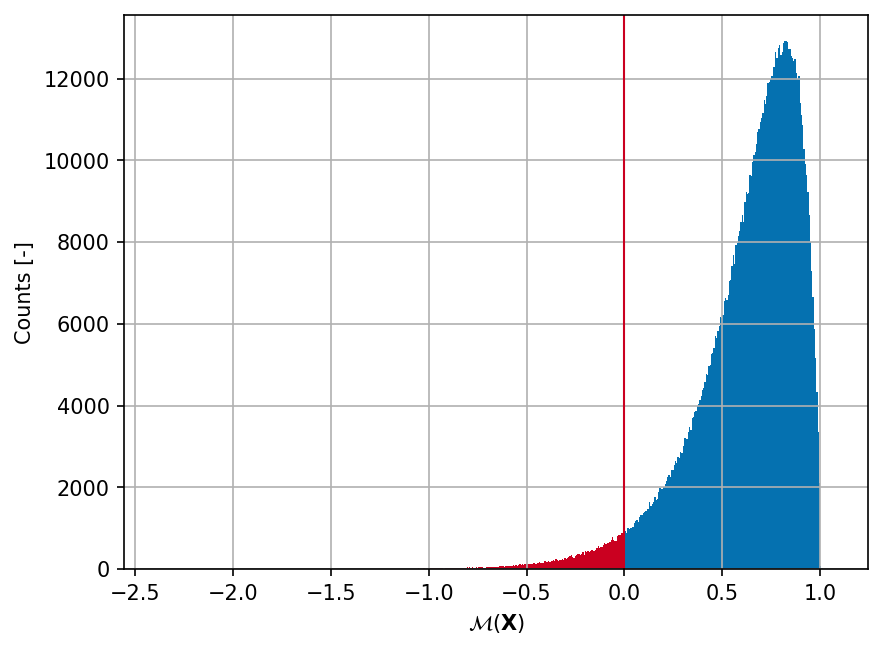

In [6]:
xx_test = my_testfun.prob_input.get_sample(1000000)
yy_test = my_testfun(xx_test)
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = plt.hist(yy_test, bins="auto", color="#0571b0")
plt.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
plt.axvline(0, linewidth=1.0, color="#ca0020")

plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.gcf().set_dpi(150);

### Failure probability ($P_f$)

Some reference values for the failure probability $P_f$ from the literature
are summarized in the table below.

|    Method     |  $N$   |      $\hat{P}_f$       | $\mathrm{CoV}[\hat{P}_f]$ |     Source     |
|:-------------:|:------:|:----------------------:|:-------------------------:|:--------------:|
|  {term}`MCS`  | $10^6$ | $3.381 \times 10^{-2}$ |    &#8212;[^error-li]     | {cite}`Li2018` |
| {term}`FORM`  |  $15$  | $1.891 \times 10^{-2}$ |          &#8212;          | {cite}`Li2018` |
| {term}`SORM`  |  $20$  | $2.672 \times 10^{-2}$ |          &#8212;          | {cite}`Li2018` |
| {term}`SSRM`  |  $12$  | $3.381 \times 10^{-2}$ |    &#8212;[^error-li]     | {cite}`Li2018` |


## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Eq. (10) in {cite}`Li2018`.

[^error-li]: The coefficient of variations of the failure probability estimates
in {cite}`Li2018` were not reported.